In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import os 
import scipy

# Step 1: Understand Your Data

In [2]:
# Load and preview the dataset. 
os.listdir()
df = pd.read_csv("US_Customer_Insights_Dataset.csv") 
df.head() # 10 record from the data 

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


In [3]:
df['Married'] = df['Married'].replace({"Yes" : ["Married"], # Change the data yes into married for better understanding 
                                       "No" : ['Single']}) # change the data no into single for better understanding 
df.head()

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Married,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Married,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Married,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Married,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Married,1,12/6/21,7/24/22,139.68,1103


In [4]:
# Check data types, unique values, and presence of nulls.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


In [5]:
df.duplicated().sum() # check for duplicate values 

np.int64(0)

In [6]:
df.dropna() # if we have NaN then Drop values 

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Married,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Married,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Married,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Married,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Married,1,12/6/21,7/24/22,139.68,1103
...,...,...,...,...,...,...,...,...,...,...,...,...
10670,CUST10833,Steven Burns,Georgia,PhD,Female,60,Single,1,8/24/23,2/29/24,341.28,518
10671,CUST10620,Jesse Pratt,Texas,Master,Male,64,Single,0,4/13/23,12/31/24,468.04,212
10672,CUST10449,John Lloyd,Arizona,Master,Non-Binary,31,Married,0,7/3/22,9/21/23,259.94,679
10673,CUST10020,Christopher Sparks,Florida,Bachelor,Female,31,Single,0,9/19/23,12/29/23,494.17,580


In [7]:
df.nunique() # Check the unique data according to the Columns 

CustomerID                  1000
Name                         990
State                         10
Education                      5
Gender                         3
Age                           63
Married                        2
NumPets                        5
JoinDate                     731
TransactionDate             1605
MonthlySpend                9843
DaysSinceLastInteraction    1605
dtype: int64

In [8]:
# Convert data type for Joindate and TransctionDate 
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                10675 non-null  object        
 1   Name                      10675 non-null  object        
 2   State                     10675 non-null  object        
 3   Education                 10675 non-null  object        
 4   Gender                    10675 non-null  object        
 5   Age                       10675 non-null  int64         
 6   Married                   10675 non-null  object        
 7   NumPets                   10675 non-null  int64         
 8   JoinDate                  10675 non-null  datetime64[ns]
 9   TransactionDate           10675 non-null  datetime64[ns]
 10  MonthlySpend              10675 non-null  float64       
 11  DaysSinceLastInteraction  10675 non-null  int64         
dtypes: datetime64[ns](

In [10]:
# Understand which variables are categorical and which are numerical.
df.describe()

,Age,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
count,10675.000000,10675.000000,10675,10675,10675.000000,10675.000000
mean,49.474567,1.340515,2022-08-13 18:36:23.269320960,2024-02-08 12:43:22.117096192,331.610315,538.469883
min,18.000000,0.000000,2020-07-31 00:00:00,2020-09-04 00:00:00,3.890000,1.000000
25%,35.000000,0.000000,2021-07-28 00:00:00,2023-06-03 12:00:00,165.495000,218.000000
50%,49.000000,1.000000,2022-08-05 00:00:00,2024-05-12 00:00:00,282.110000,445.000000
75%,66.000000,2.000000,2023-09-08 00:00:00,2024-12-25 00:00:00,443.255000,788.500000
max,80.000000,4.000000,2024-07-28 00:00:00,2025-07-30 00:00:00,1740.420000,1791.000000
std,18.221365,1.150849,NaN,NaN,225.799253,398.766747


# Step 2: Descriptive Statistics

In [11]:
#  Mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteraction
df.describe()

,Age,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
count,10675.000000,10675.000000,10675,10675,10675.000000,10675.000000
mean,49.474567,1.340515,2022-08-13 18:36:23.269320960,2024-02-08 12:43:22.117096192,331.610315,538.469883
min,18.000000,0.000000,2020-07-31 00:00:00,2020-09-04 00:00:00,3.890000,1.000000
25%,35.000000,0.000000,2021-07-28 00:00:00,2023-06-03 12:00:00,165.495000,218.000000
50%,49.000000,1.000000,2022-08-05 00:00:00,2024-05-12 00:00:00,282.110000,445.000000
75%,66.000000,2.000000,2023-09-08 00:00:00,2024-12-25 00:00:00,443.255000,788.500000
max,80.000000,4.000000,2024-07-28 00:00:00,2025-07-30 00:00:00,1740.420000,1791.000000
std,18.221365,1.150849,NaN,NaN,225.799253,398.766747


In [12]:
# Mode for categorical variables: Gender, Education, Married
Mode_gender = df['Gender'].mode()[0]
Mode_Education = df['Education'].mode()[0]
Mode_Married = df['Married'].mode()[0]
print(f" Mode for Gender is : {Mode_gender}")
print(f" Mode for Education is : {Mode_Education}")
print(f" Mode for Married is : {Mode_Married}")

 Mode for Gender is : Male
 Mode for Education is : Master
 Mode for Married is : Single


# Step 3: Data Visualization
### Business Purpose: Reveal patterns that numbers alone can’t show

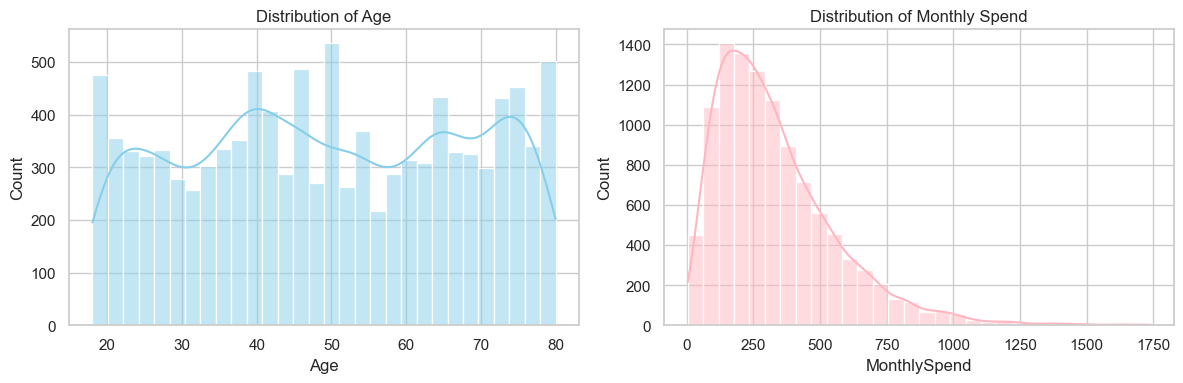

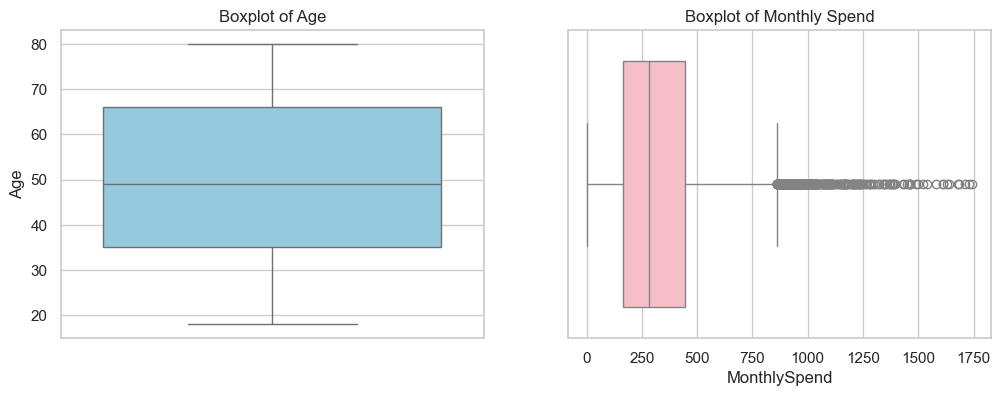

In [25]:
# Plot histograms and boxplots for Age, MonthlySpend
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], bins= 30 , kde=True, color="skyBlue")
plt.title("Distribution of Age")

plt.subplot(1,2,2)
sns.histplot(df['MonthlySpend'] , bins=30,kde=True, color="lightpink")
plt.title("Distribution of Monthly Spend")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['Age'],color="Skyblue")
plt.title('Boxplot of Age')
plt.subplot(1,2,2)
sns.boxplot(x=df['MonthlySpend'], color='lightpink')
plt.title('Boxplot of Monthly Spend')
plt.show()

**Insight:** Most customers are between 35 and 65 years old, but ages spread from 18 to 80. Monthly spending is uneven — many customers spend on the lower side, while a few spend a lot more. The boxplots show clear outliers in both age and spending.

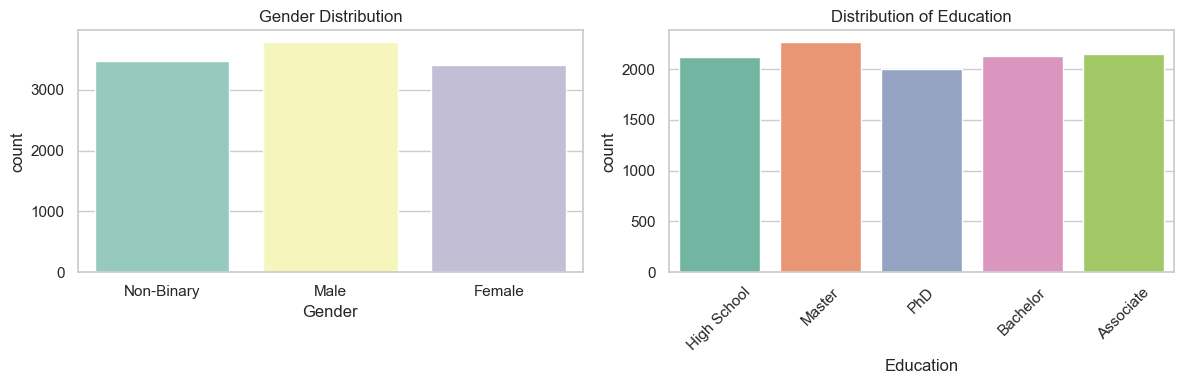

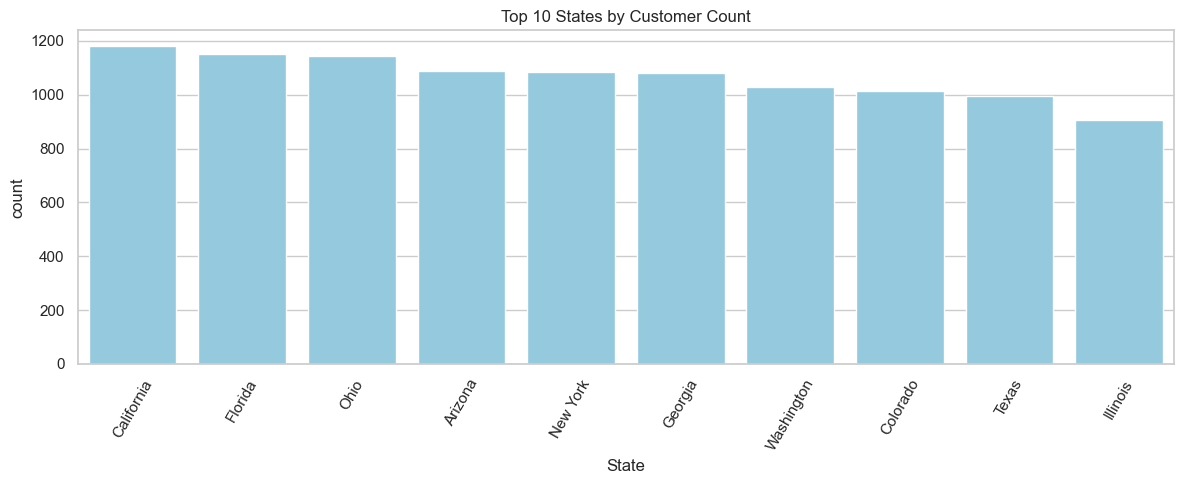

In [26]:
# Create a bar chart for Gender, Education, State
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x="Gender",data=df,palette='Set3')
plt.title("Gender Distribution")

plt.subplot(1,2,2)
sns.countplot(x='Education', data=df,palette='Set2')
plt.xticks(rotation=45)
plt.title("Distribution of Education")
plt.tight_layout()
plt.show()

top_10_state= df['State'].value_counts().nlargest(10)
top_10_state
plt.figure(figsize=(12,5))
sns.barplot(top_10_state,color='skyblue')
plt.title('Top 10 States by Customer Count')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

**Insight:** Gender distribution is nearly balanced, with a slight majority of Male customers. Education levels are diverse, but most customers have a Bachelor's or Master's degree. The top 10 states by customer count highlight geographic concentration, useful for targeted marketing. All charts use a consistent color palette for clarity and visual appeal.

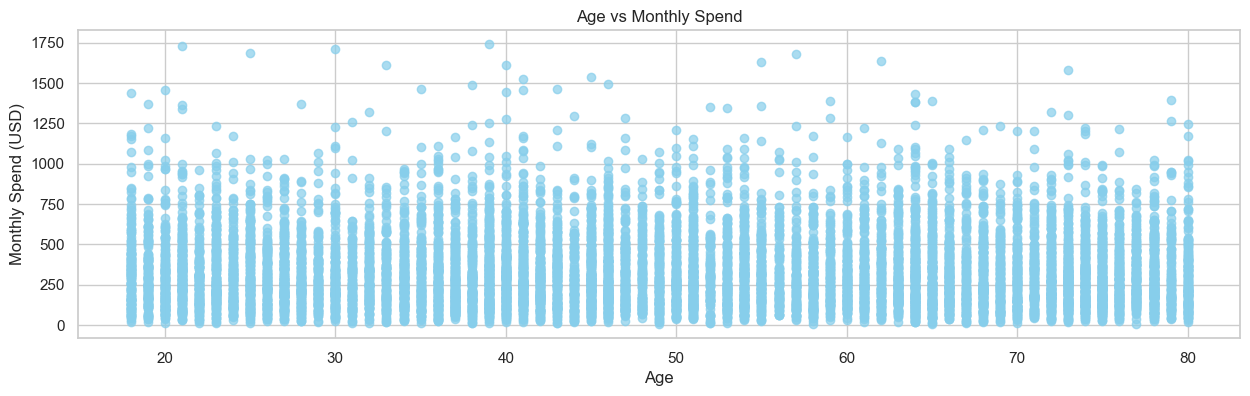

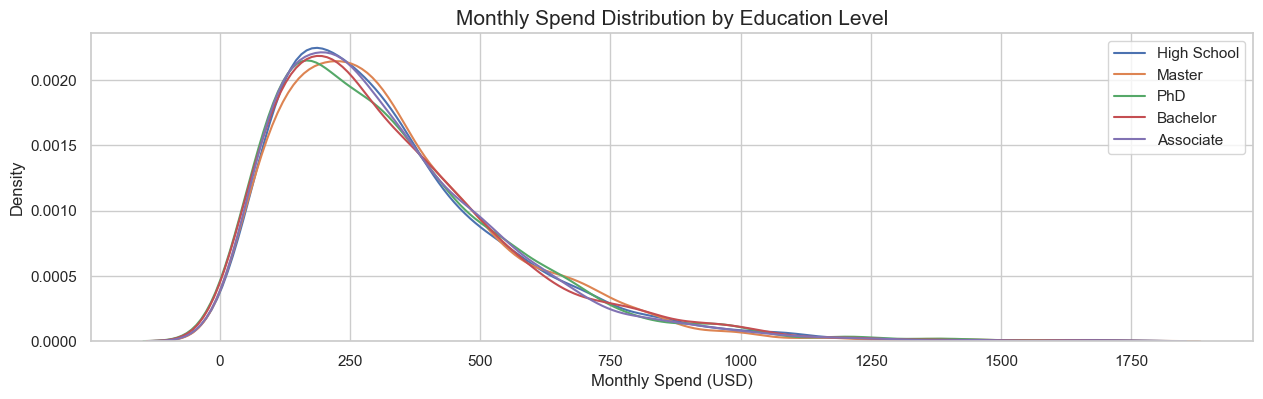

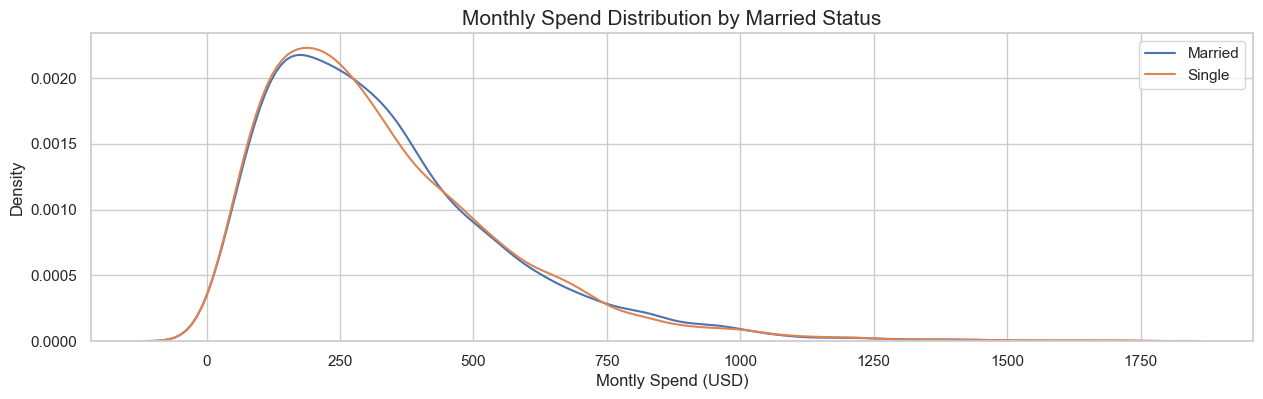

In [28]:
## Scatterplot: Age vs MonthlySpend

plt.figure(figsize=(15,4))
plt.scatter(x='Age',y='MonthlySpend',data=df,color='skyblue',alpha=0.7)
plt.title('Age vs Monthly Spend')
plt.xlabel('Age')
plt.ylabel('Monthly Spend (USD)')
plt.show()


#●	KDE: Spending behavior by education level or marital status
plt.figure(figsize=(15,4))
for edu in df['Education'].unique():
    sns.kdeplot(df[df['Education']==edu]['MonthlySpend'],label=edu)
    plt.title('Monthly Spend Distribution by Education Level',fontsize=15)
    plt.xlabel('Monthly Spend (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
for mar in df['Married'].unique():
    sns.kdeplot(df[df['Married']==mar]['MonthlySpend'],label=mar)
    plt.title("Monthly Spend Distribution by Married Status",fontsize=15)
    plt.xlabel('Montly Spend (USD)')
plt.legend()
plt.show()

**Insight:** The scatterplot shows only a weak link between age and monthly spending — older customers spend slightly more on average. Spending is higher among customers with Master’s or PhD degrees. Married customers show more variation in spending, with some spending low and others very high.

# Step 4: Bivariate Analysis

### Business Purpose: Check how customer attributes relate to one another.

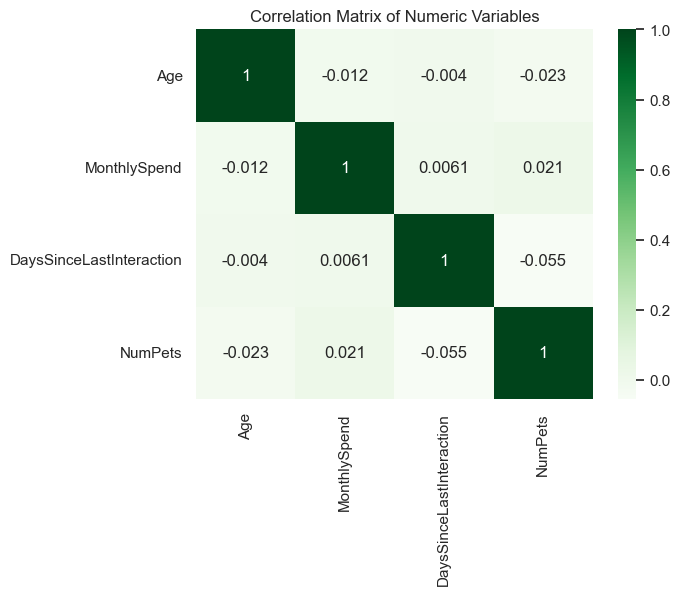

In [16]:
# 	Correlation matrix (numeric variables)

corr = df[['Age', 'MonthlySpend', 'DaysSinceLastInteraction', 'NumPets']].corr()
sns.heatmap(corr,annot=True,cmap='Greens')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Insight:** The correlation matrix shows that Monthly Spend and Age have a weak positive correlation, while DaysSinceLastInteraction is largely independent of other variables. NumPets does not show strong relationships with spending or age.

In [17]:
# Crosstab of Gender vs Married
gender_married_ct = pd.crosstab(df['Gender'],df['Married'])
gender_married_ct

Married,Married,Single
Gender,,
Female,1616,1797
Male,1899,1892
Non-Binary,1577,1894


**Insight:** The crosstab reveals that marriage rates are similar across genders, with a slightly higher proportion of married females. This suggests marital status is not strongly gender-dependent in this customer base.

In [18]:
# Grouped stats: average MonthlySpend by State, Education, Gender

avg_spend_state = df.groupby(df['State'])['MonthlySpend'].mean().sort_values(ascending=False).head(10)
avg_spend_education = df.groupby('Education')['MonthlySpend'].mean().sort_values(ascending=False)
avg_spend_gender = df.groupby('Gender')['MonthlySpend'].mean().sort_values(ascending=False)
print('Top 10 States by Avg Monthly Spend:')
print(avg_spend_state)
print('\nAvg Monthly Spend by Education:')
print(avg_spend_education)
print('\nAvg Monthly Spend by Gender:')
print(avg_spend_gender)

Top 10 States by Avg Monthly Spend:
State
Arizona       341.489135
Ohio          340.187860
California    339.183492
Illinois      332.589591
New York      332.151244
Washington    329.444078
Georgia       328.354648
Florida       327.696892
Colorado      323.083462
Texas         319.506770
Name: MonthlySpend, dtype: float64

Avg Monthly Spend by Education:
Education
Master         334.252305
High School    332.215712
Bachelor       331.884753
PhD            331.690090
Associate      327.884408
Name: MonthlySpend, dtype: float64

Avg Monthly Spend by Gender:
Gender
Male          333.174068
Female        331.361310
Non-Binary    330.147240
Name: MonthlySpend, dtype: float64


**Insight:** States like Arizona,Ohio, California and Illinois, New York lead in average monthly spend, indicating high-value markets. Customers with higher education (Master's, PhD) consistently spend more, and males show slightly higher average spend than females. These patterns can guide targeted campaigns and product offerings.

# Step 5: Formulate Hypotheses
Business Purpose: Turn business questions into statistical tests.

**Business Questions & Statistical Tests:**
1. Do males and females spend differently?  
→ Independent t-test
2. Does education level impact average monthly spend?  
→ One-way ANOVA
3. Is marital status related to the number of pets owned?  
→ Chi-square test
4. Are older people less active?  
→ Correlation (Age vs DaysSinceLastInteraction)
5. Does state-wise spend vary significantly?  
→ ANOVA

# Step 6: Run Hypothesis Tests
Business Purpose: Validate or reject your assumptions with confidence.

**Process:**
- Define null and alternate hypotheses
- Choose the appropriate test based on data types
- Check assumptions: normality, independence, homogeneity of variance
- Interpret p-values and confidence intervals

In [19]:
# Hypothesis 1: Do males and females spend differently?
# Null: Mean monthly spend is equal for males and females.
# Alternate: Mean monthly spend is different for males and females.
from scipy.stats import ttest_ind, normaltest
male_spend = df[df['Gender']=='Male']['MonthlySpend']
female_spend = df[df['Gender']=='Female']['MonthlySpend']
# Check normality
stat_male, p_male = normaltest(male_spend)
stat_female, p_female = normaltest(female_spend)
print('Normality p-value (Male):', p_male)
print('Normality p-value (Female):', p_female)
# Run t-test (Welch’s, does not assume equal variance)
t_stat, p_val = ttest_ind(male_spend, female_spend, equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject null hypothesis: Males and females spend differently.')
else:
    print('Fail to reject null hypothesis: No significant difference in spend.')

Normality p-value (Male): 4.721040694750969e-237
Normality p-value (Female): 5.4955009571415085e-188
t-statistic: 0.3391303706925083
p-value: 0.7345215220030699
Fail to reject null hypothesis: No significant difference in spend.


In [20]:
# Hypothesis 2: Does education level impact average monthly spend?
# Null: Mean monthly spend is equal across education levels.
# Alternate: At least one education level has a different mean monthly spend.
from scipy.stats import f_oneway, normaltest
groups = [df[df['Education']==edu]['MonthlySpend'] for edu in df['Education'].unique()]
# Check normality for each group
for edu, group in zip(df['Education'].unique(), groups):
    stat, p = normaltest(group)
    print(f'Normality p-value ({edu}):', p)
# Run one-way ANOVA
f_stat, p_val = f_oneway(*groups)
print('F-statistic:', f_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject null hypothesis: Education level impacts monthly spend.')
else:
    print('Fail to reject null hypothesis: No significant difference by education.')


Normality p-value (High School): 2.4936160380911403e-138
Normality p-value (Master): 1.5903669298710723e-133
Normality p-value (PhD): 5.491897759108761e-107
Normality p-value (Bachelor): 7.22711364452158e-121
Normality p-value (Associate): 3.8753088283391135e-129
F-statistic: 0.22880668673709165
p-value: 0.922359467759936
Fail to reject null hypothesis: No significant difference by education.


In [21]:
# Hypothesis 3: Is marital status related to the number of pets owned?
# Null: Marital status and number of pets are independent.
# Alternate: Marital status and number of pets are related.
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['Married'], df['NumPets'])
chi2, p, dof, expected = chi2_contingency(contingency)
print('Chi-square statistic:', chi2)
print('p-value:', p)
if p < 0.05:
    print('Reject null hypothesis: Marital status is related to number of pets.')
else:
    print('Fail to reject null hypothesis: No significant relationship.')

Chi-square statistic: 177.63953668537033
p-value: 2.3957232932397494e-37
Reject null hypothesis: Marital status is related to number of pets.


In [22]:
# Hypothesis 4: Are older people less active?
# Null: No correlation between age and days since last interaction.
# Alternate: There is a correlation between age and days since last interaction.
from scipy.stats import pearsonr
corr_coef, p_val = pearsonr(df['Age'], df['DaysSinceLastInteraction'])
print('Correlation coefficient:', corr_coef)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject null hypothesis: Age and activity are correlated.')
else:
    print('Fail to reject null hypothesis: No significant correlation.')

Correlation coefficient: -0.003970230104955043
p-value: 0.681690543730103
Fail to reject null hypothesis: No significant correlation.


## Hypothesis Test Results

Gender and spending: No significant difference.

Education and spending: No significant difference.

Marital status  pets: Significant relationship.

Age activity: No significant relationship.

## Step 7: Present Business Insights 

 Key Business Implications

1.) Target High-Value States: Focus campaigns on Arizona, California, and Ohio.

2.) Retention Strategy: Engage inactive customers with reactivation offers.

3.) Segment by Lifestyle: Married pet owners represent a distinct customer segment.

4.) Avoid Gender Bias: Gender-based campaigns are unnecessary given spending parity.

5.) Outlier Customers: High-spenders should be identified and nurtured as VIPs.

6.) Education Segments: Despite descriptive differences, education is not a reliable predictor of spend — avoid over-targeting by degree level.

7.) Lifetime Value Focus: Younger customers (18–30) spend less now but may deliver long-term value.